## Linear Regression and RANSAC

In [2]:
# Load the modules we need
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

In [3]:
#  Create some intial data
n_samples = 1000

X, y = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      random_state=0)

In [4]:
# Add some outlier data
np.random.seed(0)
n_outliers = 50
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [5]:
# Create some test positions for for the lines we will draw
line_X = np.arange(X.min(), X.max())[:, np.newaxis]

In [62]:
"""# This is the cell you need to replace to complete Task 2.
# Fit line using all data.
lr = linear_model.LinearRegression()
lr.fit(X, y) #use X and Y to create paramteres for a line
line_y = lr.predict(line_X)
print(line_y) # the result is you have the create linear modle that can be used to calculte the resultinf y values from  aset of x values"""

'# This is the cell you need to replace to complete Task 2.\n# Fit line using all data.\nlr = linear_model.LinearRegression()\nlr.fit(X, y) #use X and Y to create paramteres for a line\nline_y = lr.predict(line_X)\nprint(line_y) # the result is you have the create linear modle that can be used to calculte the resultinf y values from  aset of x values'

In [6]:
alpha = 0
beta = 0
gamma = 0
delta = 0
N = len(X)
#caluclate the values of the unknown variables
for i in range(N):
    alpha += X[i][0] * y[i]
    beta +=(X[i][0])**2
    gamma += X[i][0]
    delta += y[i]

#print("alpha, beta, gamma, delta:", alpha, beta, gamma, delta)
#solving the matrix equaltion
A = np.array([[beta,gamma],[gamma,N]])
b = np.array([alpha, delta])

#solving the matrix equation to get the result for mc
mc = np.linalg.solve(A,b)
#print("mc: ",mc)
m = mc[0]
c = mc[1]

#using the linear regression result to predict values based on an x values
line_y = []
for i in range(len(line_X)):
    line_y.append((m*line_X[i][0]) + c)
    
print("y_line: ",line_y)

y_line:  [-174.38323639022218, -120.21087252120698, -66.03850865219175, -11.866144783176537, 42.30621908583869, 96.4785829548539, 150.65094682386913, 204.82331069288435]


In [7]:
"""
# This is the cell you need to replace to complete Task 3.
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)

# Predict data of estimated models
line_y_ransac = ransac.predict(line_X)
print("ORIGINAL",line_y_ransac)

# Label the if source data is inlier or outlier
inlier_mask1 = ransac.inlier_mask_
outlier_mask1 = np.logical_not(inlier_mask1)"""

'\n# This is the cell you need to replace to complete Task 3.\n# Robustly fit linear model with RANSAC algorithm\nransac = linear_model.RANSACRegressor()\nransac.fit(X, y)\n\n# Predict data of estimated models\nline_y_ransac = ransac.predict(line_X)\nprint("ORIGINAL",line_y_ransac)\n\n# Label the if source data is inlier or outlier\ninlier_mask1 = ransac.inlier_mask_\noutlier_mask1 = np.logical_not(inlier_mask1)'

In [10]:
import math
import random

#cal the value of N
e = n_outliers/len(X) #50/1000 #FINF OUT IF THIS IS RIGHT!!
P = 0.99
S = 2
D = 0.9 # HOW DO YOU DECIDE THE RANGE FOR WHIHC VALUE COUTN AS INLIERS OR OUTLIERS

def CalcN (e, p, s):
    num = math.log(1-p)
    denom = math.log(1-((1-e)**s))
    return num/denom

#print(CalcN(e,P,S))
N = math.ceil(CalcN(e,P,S))
#calculating the differn inliers and outliers
#PointsForLinear = 2 = S^^
bestLine = [[],1000]
finalOutliers = []

def get_RandomPoints(x, Y,n):
    pointS = []
    for i in range(n):
        r = random.randint(0,len(x))
        p = [x[r][0], Y[r]]
        pointS.append(p)
    return pointS

def subtract2D(x,y):
    result = []
    result.append(x[0] - y[0])
    result.append(x[1] - y[1])
    return result

def Cal_Distance(p, x, y):
    p1 = p[0]
    p2 = p[1]
    p3 = [x,y]
    d = np.linalg.norm(np.cross(subtract2D(p2,p1), subtract2D(p1,p3)))/np.linalg.norm(subtract2D(p2,p1))
    return d

def Calc_InORout(dis, D, out):
    if abs(dis) <= D:
        return False
    else:
        return True

def Calc_NumOutliers(outs):
    n=0
    for x in outs:
        if x == True:
            n +=1
    return n
def Calc_line(p1, p2):
    m = (p1[1]-p2[1])/(p1[0]-p2[0])
    c = p2[1] - m*p2[0]
    return [m,c]



for i in range(N):
    outliers = []
    points = get_RandomPoints(X,y,S)
    for j in range(len(X)):
        distance = Cal_Distance(points, X[j][0], y[j])
        outliers.append(Calc_InORout(distance, D ,outliers))

    totalOutliers = Calc_NumOutliers(outliers)
    if  totalOutliers < bestLine[1]:
        bestLine[0] = points
        bestLine[1] = totalOutliers
        finalOutliers = outliers


mc = Calc_line(bestLine[0][0], bestLine[0][1])
m = mc[0]
c = mc[1]

#using the linear regression result to predict values based on an x values
line_y_ransac = []
for i in range(len(line_X)):
    line_y_ransac.append((m*line_X[i][0]) + c)

print("y_line: ",line_y_ransac)



outlier_mask = outliers
inliers = np.logical_not(outlier_mask)
inlier_mask = inliers

y_line:  [-257.22368295479725, -174.7857747677818, -92.3478665807663, -9.909958393750795, 72.5279497932647, 154.9658579802802, 237.4037661672957, 319.8416743543112]


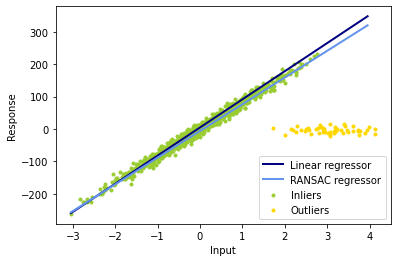

In [11]:
lw = 2

doing_linear = True
doing_ransac = True

if (doing_linear):
    plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')

if (doing_ransac):
    plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
    plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
else:
    plt.scatter(X, y, color='yellowgreen', marker='.', label='Data')
    
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()